In [6]:
!pip install -r requirements.txt

You should consider upgrading via the 'pip install --upgrade pip' command.


In [7]:
from __future__ import print_function
import torch
from torchvision import datasets, transforms
import numpy as np
from WeakLearners import WongNeuralNetCIFAR10
import matplotlib.pyplot as plt
from WeakLearners2 import WongNeuralNetCIFAR102

In [8]:
import apex

In [9]:
from Boosting import runBoosting

In [10]:
import utils

In [11]:
cuda = torch.device('cuda:0')

In [12]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2471, 0.2435, 0.2616)),
])

# Normalize the test set same as training set without augmentation
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2471, 0.2435, 0.2616)),
])

trainset = datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform_train)
train_loader = torch.utils.data.DataLoader(
    trainset, batch_size=128, shuffle=True, num_workers=2)

testset = datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform_test)
test_loader = torch.utils.data.DataLoader(
    testset, batch_size=100, shuffle=True, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


# Vanilla Wong Neural Net CIFAR10

## Non Adv

In [13]:
maxSamples = 750001

In [16]:
cifar10_vanilla = WongNeuralNetCIFAR102()
cifar10_vanilla.fit(train_loader, test_loader, adv_train=False, epsilon=0, maxSample=maxSamples)

Epoch 	 Seconds 	 LR 	 	 Train Loss 	 Train Acc
train_loader: <torch.utils.data.dataloader.DataLoader object at 0x7fd4e171d5c0>
Progress: 12800,  val accuracy: 0.3400
PGD accuracy: []
Progress: 25600,  val accuracy: 0.3900
PGD accuracy: []
Progress: 38400,  val accuracy: 0.4800
PGD accuracy: []
train_loader: <torch.utils.data.dataloader.DataLoader object at 0x7fd4e171d5c0>
Progress: 62848,  val accuracy: 0.5600
PGD accuracy: []
Progress: 75648,  val accuracy: 0.6500
PGD accuracy: []
Progress: 88448,  val accuracy: 0.6900
PGD accuracy: []
train_loader: <torch.utils.data.dataloader.DataLoader object at 0x7fd4e171d5c0>
Progress: 112896,  val accuracy: 0.6400
PGD accuracy: []
Progress: 125696,  val accuracy: 0.6800
PGD accuracy: []
Progress: 138496,  val accuracy: 0.7000
PGD accuracy: []
train_loader: <torch.utils.data.dataloader.DataLoader object at 0x7fd4e171d5c0>
Progress: 162944,  val accuracy: 0.7500
PGD accuracy: []
Progress: 175744,  val accuracy: 0.7500
PGD accuracy: []
Progress: 1

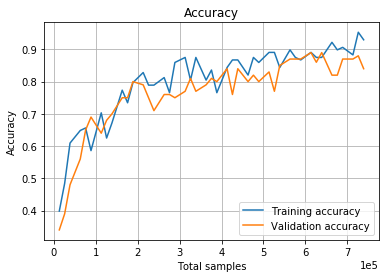

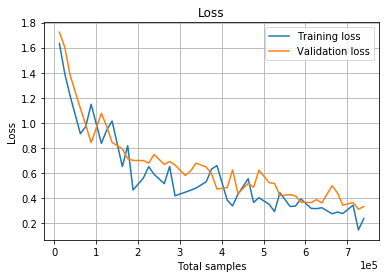

In [17]:
path_head = 'results/plots/cifar10_wl/eps_0/'
acc_file = path_head + f'wl_acc_maxSamples_{maxSamples}.png'
adv_acc_file = path_head + f'adv_acc_maxSamples_{maxSamples}.png'
loss_file = path_head + f'loss_maxSamples_{maxSamples}.png'
cifar10_vanilla.plot_accuracies(acc_file)
cifar10_vanilla.plot_loss(loss_file)

## Adversarial

In [8]:
from AdversarialAttacks import attack_fgsm, attack_pgd

In [9]:
# maxSamples = int(2e6)
maxSamples = 750001

In [10]:
cifar10_adv = WongNeuralNetCIFAR102(attack_eps=[0.127], train_eps=8)
cifar10_adv.fit(train_loader, test_loader, adv_train=True, val_attacks=[attack_pgd], maxSample=maxSamples)

Epoch 	 Seconds 	 LR 	 	 Train Loss 	 Train Acc
train_loader: <torch.utils.data.dataloader.DataLoader object at 0x7f789538f198>
Progress: 12800,  val accuracy: 0.2400
PGD accuracy: [[0.12]]
Progress: 25600,  val accuracy: 0.3200
PGD accuracy: [[0.12, 0.21]]
Progress: 38400,  val accuracy: 0.3400
PGD accuracy: [[0.12, 0.21, 0.27]]
train_loader: <torch.utils.data.dataloader.DataLoader object at 0x7f789538f198>
Progress: 62848,  val accuracy: 0.4500
PGD accuracy: [[0.12, 0.21, 0.27, 0.27]]
Progress: 75648,  val accuracy: 0.4000
PGD accuracy: [[0.12, 0.21, 0.27, 0.27, 0.26]]
Progress: 88448,  val accuracy: 0.4500
PGD accuracy: [[0.12, 0.21, 0.27, 0.27, 0.26, 0.28]]
train_loader: <torch.utils.data.dataloader.DataLoader object at 0x7f789538f198>
Progress: 112896,  val accuracy: 0.3900
PGD accuracy: [[0.12, 0.21, 0.27, 0.27, 0.26, 0.28, 0.24]]
Progress: 125696,  val accuracy: 0.4900
PGD accuracy: [[0.12, 0.21, 0.27, 0.27, 0.26, 0.28, 0.24, 0.34]]
Progress: 138496,  val accuracy: 0.4900
PGD ac

In [ ]:
cifar10_adv.accuracies

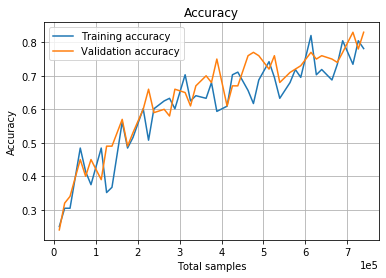

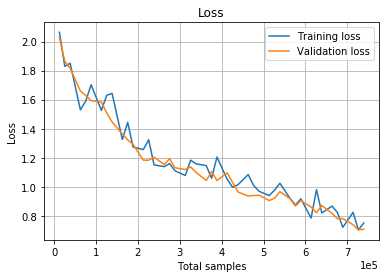

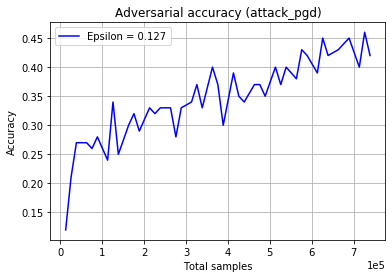

In [11]:
path_head = 'results/plots/cifar10_wl/eps_8/'
acc_file = path_head + f'wl_acc_maxSamples_{maxSamples}.png'
adv_acc_file = path_head + f'adv_acc_maxSamples_{maxSamples}.png'
loss_file = path_head + f'loss_maxSamples_{maxSamples}.png'
cifar10_adv.plot_accuracies(acc_file)
cifar10_adv.plot_loss(loss_file)
cifar10_adv.plot_adversarial_accuracies(adv_acc_file)

In [ ]:
print(cifar10_adv.train_checkpoints)